# Part 2: Tensors

This material is dry.. but important! LOCK IN.

Tensors are the **workhorse of modern machine learning**. Every piece of data that flows through a neural network (audio samples, MIDI notes, lyrics, images, spectrograms, etc) must first be encoded in tensors.

If you want to understand what's happening inside these systems (and not just treat them as black boxes), you should understand what a tensor is.

In this notebook, we will explore tensors and use them to build simple audio synthesizer. Notably we will NOT use neural networks... just tensors.

In [1]:
# Run this cell before you start
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio

def check(my_guess, correct):
    """Check your guess against the correct answer."""
    guess_tensor = torch.tensor(my_guess, dtype=torch.float32)
    correct_tensor = torch.tensor(correct, dtype=torch.float32) if not isinstance(correct, torch.Tensor) else correct.float()
    
    if torch.allclose(guess_tensor, correct_tensor, atol=0.01):
        print("✓ Correct!")
    else:
        rounded = [round(x, 2) for x in correct_tensor.tolist()] if correct_tensor.dim() > 0 else round(correct_tensor.item(), 2)
        print(f"✗ Not quite. The answer is: {rounded}")

def show_waveform(tensor1, tensor2=None, title="Waveform"):
    """Display one or two waveforms. Second waveform shown in orange."""
    plt.figure(figsize=(10, 3))
    plt.plot(tensor1, color='tab:blue')
    if tensor2 is not None:
        plt.plot(tensor2, color='tab:orange')
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)
    plt.show()

## What is a Tensor?

A tensor is a multi-dimensional array of numbers.

- A **vector** is a 1-dimensional tensor (a list of numbers)
- A **matrix** is a 2-dimensional tensor (a grid of numbers)
- Higher dimensions follow the same pattern

## Creating Tensors

Create a tensor from a Python list:

In [2]:
# Create a 1D tensor (vector) from a list
a = torch.tensor([1, 2, 3, 4, 5])
print(a)

tensor([1, 2, 3, 4, 5])


In [8]:
# Create a 2D tensor (matrix) from nested lists
b = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(b)

tensor([[1, 2, 3],
        [4, 5, 6]])


## Shape

The **shape** of a tensor tells you how many elements it has in each dimension.

- Shape `(5,)` means 5 elements in one dimension
- Shape `(2, 3)` means 2 rows, 3 columns

In [9]:
a = torch.tensor([1, 2, 3, 4, 5])
print(f"a = {a}")
print(f"a.shape = {a.shape}")

a = tensor([1, 2, 3, 4, 5])
a.shape = torch.Size([5])


In [10]:
b = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print("b =")
print(b)
print(f"b.shape = {b.shape}")

b =
tensor([[1, 2, 3],
        [4, 5, 6]])
b.shape = torch.Size([2, 3])


## Useful Creation Functions

In [11]:
# All zeros
print("torch.zeros(3, 4):")
print(torch.zeros(3, 4))

torch.zeros(3, 4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [12]:
# All ones
print("torch.ones(2, 5):")
print(torch.ones(2, 5))

torch.ones(2, 5):
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [13]:
# Evenly spaced values - THIS ONE IS VERY IMPORTANT!
# linspace(start, end, count) gives you `count` evenly spaced values from start to end
print(f"torch.linspace(0, 1, 5) = {torch.linspace(0, 1, 5)}")
print(f"torch.linspace(0, 10, 6) = {torch.linspace(0, 10, 6)}")

torch.linspace(0, 1, 5) = tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])
torch.linspace(0, 10, 6) = tensor([ 0.,  2.,  4.,  6.,  8., 10.])


### Your turn

Predict what `torch.linspace(0, 1, 11)` will produce:

In [14]:
my_guess = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]  # Fill in your guess as a list

check(my_guess, torch.linspace(0, 1, 11))

✓ Correct!


## Indexing

Access elements using square brackets. Indexing starts at 0. Notice that the results have different dimensions.

In [19]:
t = torch.tensor([10, 20, 30, 40, 50])
a = t[0]  # first element
b = t[-1] # last element
c = t[1:4] # slice: elements 1, 2, 3

print("t = ", t)
print("a = ", a)
print("b = ", b)
print("c = ", c)

t =  tensor([10, 20, 30, 40, 50])
a =  tensor(10)
b =  tensor(50)
c =  tensor([20, 30, 40])


## Element-wise Operations: The Key Concept

This is the most important idea in this notebook.

When you apply an operation to a tensor, it happens **to each element individually**. You put in a tensor with N numbers, you get back a tensor with N numbers.

In [20]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(f"x = {x}")
print(f"x has {len(x)} elements")

x = tensor([1., 2., 3., 4.])
x has 4 elements


In [21]:
# Multiply each element by 2
result = x * 2
print(f"x * 2 = {result}")
print(f"result has {len(result)} elements")

x * 2 = tensor([2., 4., 6., 8.])
result has 4 elements


Notice:
- Input: 4 numbers
- Output: 4 numbers
- Each input number was multiplied by 2 independently

In [22]:
# Square each element
result = x ** 2
print(f"x ** 2 = {result}")
print(f"Still {len(result)} elements")

x ** 2 = tensor([ 1.,  4.,  9., 16.])
Still 4 elements


Same pattern: 4 numbers in, 4 numbers out.

This also works with functions like `torch.sin()`:

In [23]:
values = torch.tensor([0.0, 1.0, 2.0, 3.0])
print(f"values = {values}")
print(f"torch.sin(values) = {torch.sin(values)}")
print(f"Still {len(torch.sin(values))} elements")

values = tensor([0., 1., 2., 3.])
torch.sin(values) = tensor([0.0000, 0.8415, 0.9093, 0.1411])
Still 4 elements


**The pattern:**
- Put in a tensor with N numbers
- Get back a tensor with N numbers  
- Each number was transformed independently

## Element-wise Operations Between Two Tensors

When you operate on two tensors of the same size, it pairs up corresponding elements:

In [24]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"a = {a}")
print(f"b = {b}")
print(f"a + b = {a + b}")
print(f"a * b = {a * b}")

a = tensor([1., 2., 3.])
b = tensor([4., 5., 6.])
a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])


`a * b` multiplied each element of `a` by the corresponding element of `b`:
- Position 0: `1.0 * 4.0 = 4.0`
- Position 1: `2.0 * 5.0 = 10.0`
- Position 2: `3.0 * 6.0 = 18.0`

### Your turn

Predict what `twos * count` will be:

In [25]:
twos = torch.tensor([2, 2, 2, 2])
count = torch.tensor([1, 2, 3, 4])

my_guess = [2, 4, 6, 8]  # Fill in your guess

check(my_guess, twos * count)

✓ Correct!


Predict what `two * count` will be

In [27]:
twos = torch.tensor([2])
count = torch.tensor([1, 2, 3, 4])

my_guess = [2, 4, 6, 8]  # Fill in your guess

check(my_guess, twos * count)

✓ Correct!


In [30]:
# Interesting! How are the two previous cells different from each other?

# Consider: How are the following different? Which ones would work in the cell above?
two = 2
two = torch.tensor(2)
twos = torch.tensor([2])
twos = torch.tensor([2, 2, 2, 2])
twos = torch.tensor([2, 2, 2, 2, 2])
twos = torch.tensor([[2, 2], [2, 2]])

# The general pattern is called "Broadcasting". Google it to get nerd sniped.

---

# Project: Build a Melody Synthesizer

Now let's use what we've learned to make some sound.

## Step 1: Generate a Sine Wave

A sine wave is the simplest sound. To make one, we need:

1. A list of time values (when we want to sample the wave)
2. For time value $t$, calculate $\sin(t)$

**Key insight: we pass a tensor of time values into sin(), and get back a tensor of amplitude values.**

Let's start small: just 10 time values over 1 second.

In [32]:
# Create 10 time values from 0 to 1 second
t = torch.linspace(0, 1, 10)
print(f"t is a tensor with {len(t)} that counts from 0 to 1 in ten equally spaced steps")

t is a tensor with 10 that counts from 0 to 1 in ten equally spaced steps


Each value in `t` is a moment in time:
- `t[0] = 0.0` → the start
- `...`
- `t[9] = 1.0` → one second later

The formula for a sine wave is:

```
amplitude = sin(2π × frequency × time)
```

For a 1 Hz wave (one cycle per second), let's build it step by step:

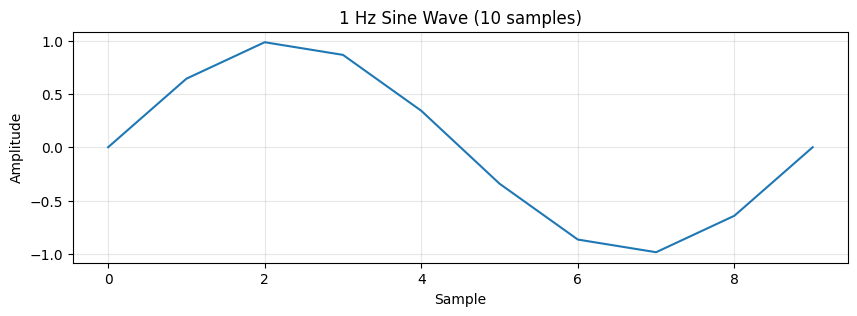

In [33]:
frequency = 1  # 1 Hz = one cycle per second
two_pi = 2 * torch.pi # 2π is approximately 6.28

# Step 1: multiply time by frequency and 2π
angles = two_pi * frequency * t   # `angles` is an tensor with 10 elements

# Step 2: apply sin() to get our wave
wave = torch.sin(angles)                # `wave` is an tensor with 10 elements

show_waveform(wave, title="1 Hz Sine Wave (10 samples)")

Are you sure you understand the size of EACH tensor and variable above?

We started with 10 time values and ended with 10 amplitude values. You may be familiar with iterating over an array to operate on each element. That works, **but is computationally very slow**. In Machine Learning we want *fast* computation!

We can write the whole formula in one line:

In [34]:
t = torch.linspace(0, 1, 10)
frequency = 1


wave = torch.sin(2 * torch.pi * frequency * t)
print(f"wave = {wave}")

wave = tensor([ 0.0000e+00,  6.4279e-01,  9.8481e-01,  8.6603e-01,  3.4202e-01,
        -3.4202e-01, -8.6603e-01, -9.8481e-01, -6.4279e-01,  1.7485e-07])


### 
Your turn

Generate a **2 Hz** sine wave using the same 10 time samples.

A 2 Hz wave completes 2 cycles per second. How many complete waves should you see?

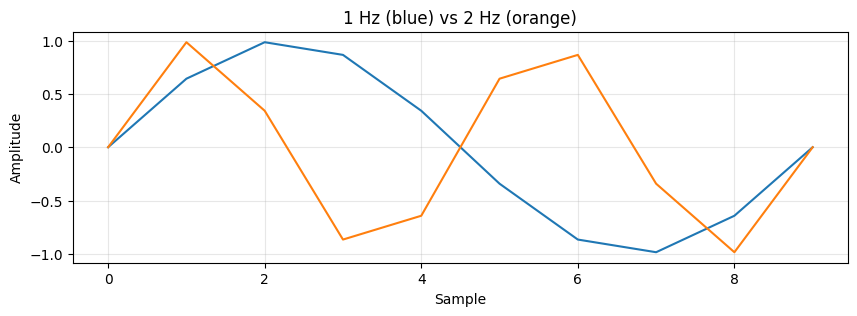

In [40]:
t = torch.linspace(0, 1, 10)
frequency = 2




wave_2hz = torch.sin(2 * torch.pi * frequency * t) # FILL THIS IN using the formula

show_waveform(wave, wave_2hz, "1 Hz (blue) vs 2 Hz (orange)")

## 
Step 2: Scale Up to Real Audio

10 samples isn't enough for actual sound. CD-quality audio uses **44,100 samples per second**.

The process is identical—we just use more time values.

In [41]:
sample_rate = 44100  # samples per second
duration = 0.5       # seconds
frequency = 440      # Hz (A4 - the note orchestras tune to)

# How many samples?
num_samples = int(sample_rate * duration)
print(f"For {duration} seconds at {sample_rate} samples/sec, we need {num_samples} samples")

For 0.5 seconds at 44100 samples/sec, we need 22050 samples


In [42]:
# Create time values
t = torch.linspace(0, duration, num_samples)
print(f"t has {len(t)} values")
print(f"t goes from {t[0]} to {t[-1]}")

t has 22050 values
t goes from 0.0 to 0.5


In [43]:
# Generate the sine wave
wave = torch.sin(2 * torch.pi * frequency * t)
print(f"wave has {len(wave)} samples")

wave has 22050 samples


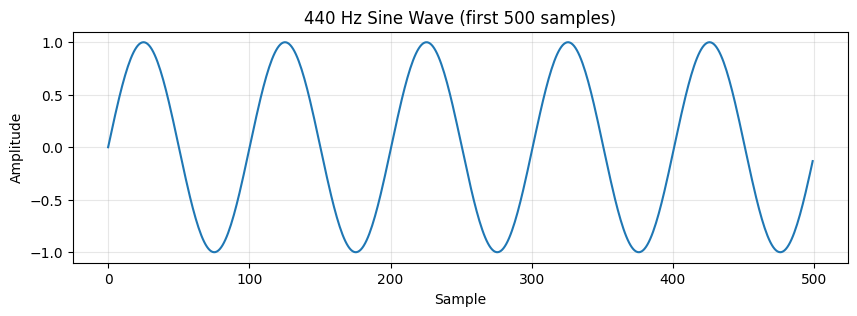

In [44]:
# Visualize just the first 500 samples
show_waveform(wave[:500], title="440 Hz Sine Wave (first 500 samples)")

In [45]:
# Play it!
Audio(wave, rate=sample_rate)

### Your turn

Generate and play a **523 Hz** sine wave (that's C5). Make it **0.3 seconds** long.

Calculate `num_samples`, create `t`, then generate `wave`.

In [50]:
sample_rate = 44100
duration = 0.3
frequency = 523

num_samples =  13230  # FILL THIS IN
t = torch.linspace(0, 0.3, 13230 )          # FILL THIS IN
wave =  torch.sin(2 * torch.pi * frequency * t)       # FILL THIS IN

Audio(wave, rate=sample_rate)

## Step 3: Add an Envelope

That sine wave sounds harsh—it starts and stops abruptly. Listen for the "click" at the beginning and end.

Real sounds fade in and out. We can shape the volume over time using an **envelope**.

An envelope is a tensor of values between 0 and 1. When we **multiply** it with our wave, it scales the amplitude at each moment.

wave:     tensor([1., 1., 1., 1., 1.])
envelope: tensor([0.2000, 0.5000, 1.0000, 0.5000, 0.2000])
result:   tensor([0.2000, 0.5000, 1.0000, 0.5000, 0.2000])


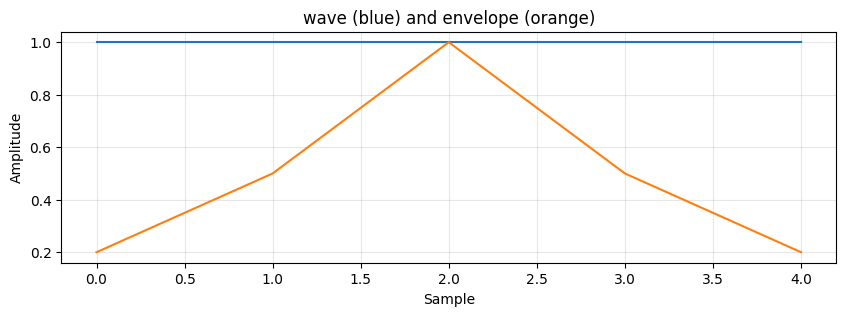

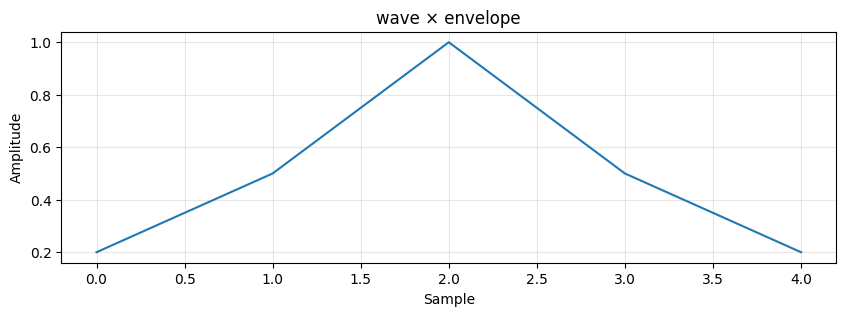

In [51]:
# Simple example with just 5 samples
simple_wave = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0])
simple_envelope = torch.tensor([0.2, 0.5, 1.0, 0.5, 0.2])

print(f"wave:     {simple_wave}")
print(f"envelope: {simple_envelope}")
print(f"result:   {simple_wave * simple_envelope}")

show_waveform(simple_wave, simple_envelope, "wave (blue) and envelope (orange)")
show_waveform(simple_wave * simple_envelope, title="wave × envelope")

Element-by-element multiplication:
- Position 0: `1.0 × 0.2 = 0.2` (quiet)
- Position 1: `1.0 × 0.5 = 0.5` (medium)
- Position 2: `1.0 × 1.0 = 1.0` (full volume)
- Position 3: `1.0 × 0.5 = 0.5` (medium)
- Position 4: `1.0 × 0.2 = 0.2` (quiet)

The envelope shaped the wave—fading in and out.

### Your turn

Predict what `wave_2 * envelope_2` will be:

✗ Not quite. The answer is: [0.0, 0.5, 0.5, 0.0]


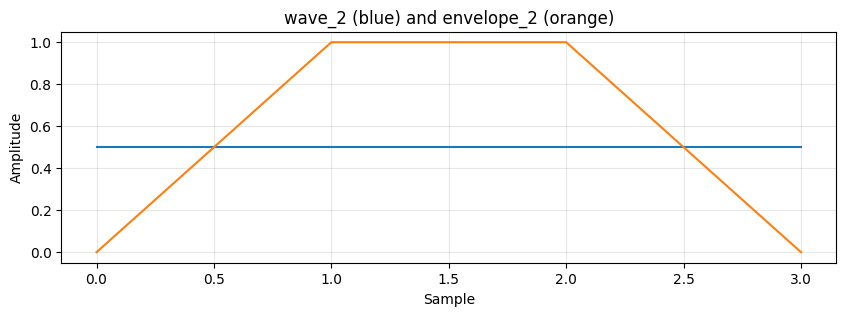

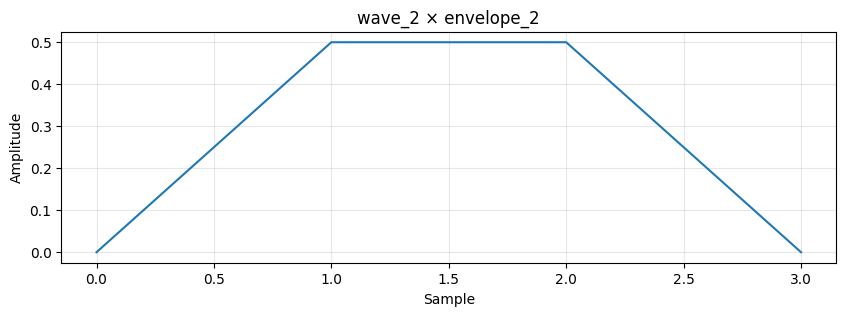

In [52]:
wave_2 = torch.tensor([0.5, 0.5, 0.5, 0.5])
envelope_2 = torch.tensor([0.0, 1.0, 1.0, 0.0])

my_guess = [0.0, 1.0, 1.0, 0.0]  # Fill in your guess

check(my_guess, wave_2 * envelope_2)
show_waveform(wave_2, envelope_2, "wave_2 (blue) and envelope_2 (orange)")
show_waveform(wave_2 * envelope_2, title="wave_2 × envelope_2")

## Step 4: Create a Real Envelope

For our synthesizer, we'll create an envelope that:
- Fades in over the first few milliseconds (attack)
- Stays at full volume in the middle
- Fades out at the end (release)

In [55]:
def make_envelope(num_samples, attack_samples, release_samples):
    """Create an attack-sustain-release envelope."""
    envelope = torch.ones(num_samples)  # Start with all 1s (full volume)
    
    # Attack: ramp from 0 to 1
    if attack_samples > 0:
        envelope[:attack_samples] = torch.linspace(0, 1, attack_samples)
    
    # Release: ramp from 1 to 0
    if release_samples > 0:
        envelope[-release_samples:] = torch.linspace(1, 0, release_samples)
    
    return envelope

In [56]:
# First, let's regenerate our 440 Hz wave from earlier
sample_rate = 44100
duration = 0.5
frequency = 440

num_samples = int(sample_rate * duration)
t = torch.linspace(0, duration, num_samples)
wave = torch.sin(2 * torch.pi * frequency * t)

print(f"wave has {len(wave)} samples")

wave has 22050 samples


envelope has 22050 samples
wave has 22050 samples


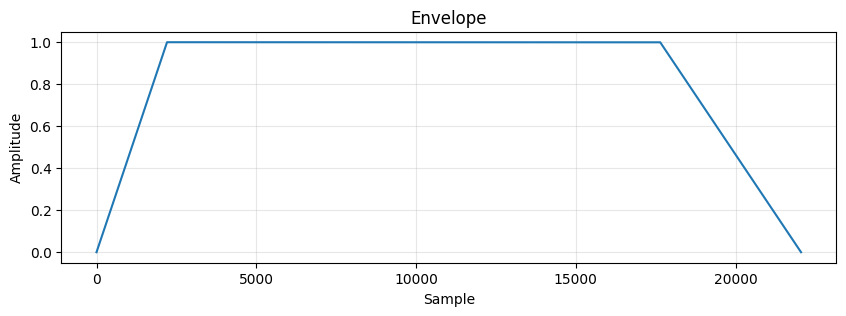

In [57]:
# Create an envelope: 50ms attack, 100ms release
attack_samples = int(0.05 * sample_rate)   # 50ms
release_samples = int(0.1 * sample_rate)   # 100ms

envelope = make_envelope(len(wave), attack_samples, release_samples)

print(f"envelope has {len(envelope)} samples")
print(f"wave has {len(wave)} samples")

show_waveform(envelope, title="Envelope")

### Your turn

Apply the envelope to the wave using element-wise multiplication.

You can use the `wave` and `envelope` tensors from the cells above.

shaped_wave has 22050 samples


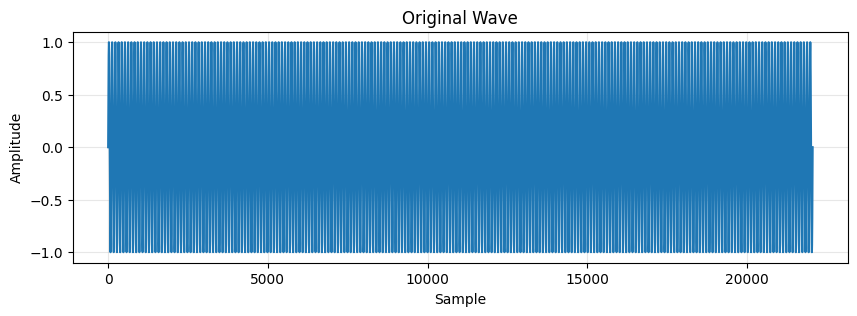

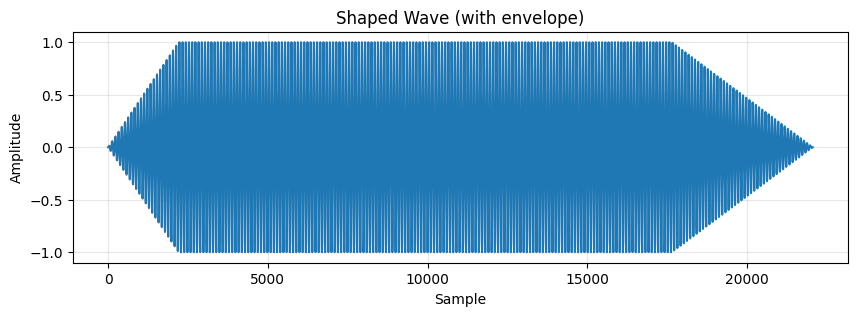

In [58]:
shaped_wave = wave * envelope  # FILL THIS IN: multiply wave by envelope

print(f"shaped_wave has {len(shaped_wave)} samples")
show_waveform(wave, title="Original Wave")
show_waveform(shaped_wave, title="Shaped Wave (with envelope)")

In [59]:
# Listen to the difference
print("Without envelope:")
display(Audio(wave, rate=sample_rate))

print("With envelope:")
display(Audio(shaped_wave, rate=sample_rate))

Without envelope:


With envelope:


The envelope removes the harsh click!

## Step 5: Concatenate Notes

To make a melody, we need to play notes one after another. We do this by **concatenating** tensors—joining them end-to-end.

`torch.cat([tensor1, tensor2])` joins tensors together.

In [60]:
first = torch.tensor([1, 2, 3])
second = torch.tensor([4, 5, 6])

combined = torch.cat([first, second])

print(f"first:    {first}  ({len(first)} elements)")
print(f"second:   {second}  ({len(second)} elements)")
print(f"combined: {combined}  ({len(combined)} elements)")

first:    tensor([1, 2, 3])  (3 elements)
second:   tensor([4, 5, 6])  (3 elements)
combined: tensor([1, 2, 3, 4, 5, 6])  (6 elements)


### Your turn

If `a` has 100 elements and `b` has 200 elements, how many elements will `torch.cat([a, b])` have?

In [62]:
a = torch.zeros(100)
b = torch.ones(200)

my_guess = 300  # Fill in your guess (a single number)

check(my_guess, len(torch.cat([a, b])))

✓ Correct!


Here's a helper function that creates a note with an envelope built in:

In [63]:
def make_note(frequency, duration, sample_rate=44100, attack=0.02, release=0.05):
    """Generate a single note with envelope."""
    num_samples = int(sample_rate * duration)
    t = torch.linspace(0, duration, num_samples)
    wave = torch.sin(2 * torch.pi * frequency * t)
    
    attack_samples = int(attack * sample_rate)
    release_samples = int(release * sample_rate)
    envelope = make_envelope(num_samples, attack_samples, release_samples)
    
    return wave * envelope

In [64]:
# Create two notes
note_C = make_note(262, 0.3)  # C4, 0.3 seconds
note_E = make_note(330, 0.3)  # E4, 0.3 seconds

print(f"note_C has {len(note_C)} samples")
print(f"note_E has {len(note_E)} samples")

note_C has 13230 samples
note_E has 13230 samples


### Your turn

Use `torch.cat()` to concatenate `note_C` and `note_E` into a single tensor.

The `note_C` and `note_E` tensors were created in the cell above.

In [65]:
two_notes = torch.cat([note_C, note_E])  # FILL THIS IN

print(f"two_notes has {len(two_notes)} samples")
Audio(two_notes, rate=sample_rate)

two_notes has 26460 samples


### Your turn

Add a third note (G4 = 392 Hz, 0.3 seconds) and concatenate all three.

Hint: `torch.cat()` can take a list of more than two tensors!

In [66]:
note_G = make_note(392, 0.3)     # FILL THIS IN: use make_note()
three_notes = torch.cat([two_notes, note_G]) # FILL THIS IN: concatenate all three

print(f"three_notes has {len(three_notes)} samples")
Audio(three_notes, rate=sample_rate)

three_notes has 39690 samples


## Step 6: Build a Melody

We can represent a melody as data: a list of (frequency, duration) pairs.

| Note | Frequency (Hz) |
|------|---------------|
| C4   | 262 |
| D4   | 294 |
| E4   | 330 |
| F4   | 349 |
| G4   | 392 |
| A4   | 440 |
| B4   | 494 |
| C5   | 523 |

In [67]:
C4, D4, E4, F4, G4, A4, B4, C5 = 262, 294, 330, 349, 392, 440, 494, 523

In [68]:
# A melody as data
melody_data = [
    (C4, 0.25),
    (D4, 0.25),
    (E4, 0.25),
    (C4, 0.25),
    (C4, 0.25),
    (D4, 0.25),
    (E4, 0.25),
    (C4, 0.25),
    (E4, 0.25),
    (F4, 0.25),
    (G4, 0.5),
]

To turn this data into audio, we:
1. Loop through each (frequency, duration) pair
2. Create a note for each one
3. Collect all the notes in a list
4. Concatenate them all together

In [69]:
# Generate the melody
notes = []

for freq, dur in melody_data:
    note = make_note(freq, dur)
    notes.append(note)

# Now `notes` is a list of tensors. Concatenate them:
melody = torch.cat(notes)

print(f"We created {len(notes)} notes")
print(f"melody has {len(melody)} samples")
print(f"Duration: {len(melody) / sample_rate:.2f} seconds")

We created 11 notes
melody has 132300 samples
Duration: 3.00 seconds


In [70]:
Audio(melody, rate=sample_rate)

### Your turn

Create your own melody! Define the notes as (frequency, duration) pairs, then use the same loop pattern to generate it.

In [81]:
# Define your melody
my_melody_data = [(F4, 0.25),
    (E4, 0.25),
    (F4, 0.25),
    (G4, 0.25),
    (F4, 0.75),
    (F4, 0.25),
    (E4, 0.25),
    (F4, 0.25),
    (G4, 0.25),
    (F4, 0.75),
    
    
    # (frequency, duration),
    # Example: (C4, 0.25), (E4, 0.25), (G4, 0.5)
]

# Generate it (copy the loop pattern from above)
my_notes = []
for freq, dur in my_melody_data:
    note = make_note(freq, dur)
    my_notes.append(note)
    pass  # FILL THIS IN

my_melody = torch.cat(my_notes)  # FILL THIS IN

Audio(my_melody, rate=sample_rate)

## Reflection: Data as Tensors

Look at what we just did:

**Symbolic representation** (the melody data):
```python
[(262, 0.25), (294, 0.25), (330, 0.25), ...]
```
This describes *what* notes to play and *for how long*—like sheet music.

**Audio representation** (the waveform tensor):
```python
tensor([0.0000, 0.0372, 0.0743, ..., -0.0372, 0.0000])
```
This is the actual sound—thousands of amplitude values per second.

Both can be encoded as tensors – the fundamental language of neural networks.

- Traditional synthesizers (like the one we just built) can convert symbolic music data (like MIDI) to Audio Waveforms.
- Humans can convert symbolic data (such as sheet music) to Audio Wavforms too!
- Neural networks can ALSO do this. Amazing!

Great, but what ***is*** a neural network? More info coming in MTEC-345.

### Your turn

Write a few sentences reflecting on:

1. What did we encode as tensors in this notebook? (List at least two things)
2. Why do you think neural networks need data in tensor form?
3. What questions do you have?

*Your reflection here...*
1.make_note and envelope
2.Neural Networks could utilize the data structure of tensors in matrix and it's versatile input and ouput setup.
3.I don't understand what do I need to fill in for pass?


---

## Summary

You learned:

- **Creating tensors**: `torch.tensor()`, `torch.zeros()`, `torch.ones()`, `torch.linspace()`
- **Shape**: `tensor.shape` tells you the dimensions
- **Element-wise operations**: Operations transform each element independently. N numbers in → N numbers out.
- **Element-wise multiplication**: `tensor1 * tensor2` pairs up corresponding elements
- **Concatenation**: `torch.cat()` joins tensors end-to-end

You built a synthesizer by:
1. Creating time values with `torch.linspace()`
2. Generating waves with `torch.sin(2π × freq × t)`
3. Shaping with envelopes using element-wise multiplication
4. Building melodies with `torch.cat()`

These same operations power the neural networks we'll study next.